## Capstone- Cancer Histopathology: Evaluate CNN Models

Dataset:
- A. Borkowski, "Lung and Colon Cancer Histopathological Images", Kaggle.com, 2020. [Online]. Available: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images. [Accessed: 30- Jul- 2022].

Sources:
- Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Image Labels:
- Lung benign tissue: 3
- Lung adenocarcinoma: 2
- Lung squamous cell carcinoma: 4
- Colon adenocarcinoma: 0
- Colon benign tissue: 1

### Import Libraries

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import re as regex
from pathlib import Path
import time
import math

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

import string
from collections import Counter

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Data

In [2]:
import PIL
from PIL import Image
import glob
import os, os.path
from numpy import asarray

import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from IPython.display import display, HTML
import pymongo
from pymongo import MongoClient
import io
from bson.binary import Binary

In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras.applications.xception import Xception
from keras.applications import *
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from keras.models import load_model

In [4]:
%%time
dfShuffledData= pd.DataFrame(np.load('shufGenData96.npy', allow_pickle= True),
                             columns=['imageVector', 'label', 'classLabel', 'image', 'labelName'])
dfShuffledData.head()

CPU times: total: 4.86 s
Wall time: 28.7 s


,imageVector,label,classLabel,image,labelName
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc


In [5]:
def originSize(image):
    imgVect= image * 255.0
    return imgVect

In [6]:
%%time
dfShuffledData['originSize']= dfShuffledData['imageVector'].apply(originSize)

CPU times: total: 55.9 s
Wall time: 56 s


In [7]:
dfShuffledData.head()

,imageVector,label,classLabel,image,labelName,originSize
0,"[[[0.9960785, 0.98823535, 0.9921569], [0.98823...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[254.00002, 252.00002, 253.00002], [252.0000..."
1,"[[[0.98823535, 0.97647065, 0.9568628], [0.8470...","[1.0, 0.0, 0.0, 0.0, 0.0]",0,<PIL.Image.Image image mode=RGB size=96x96 at ...,colon_aca,"[[[252.00002, 249.00002, 244.00002], [216.0000..."
2,"[[[0.79215693, 0.6745098, 0.96470594], [0.7647...","[0.0, 0.0, 1.0, 0.0, 0.0]",2,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_aca,"[[[202.00002, 172.0, 246.00002], [195.00002, 1..."
3,"[[[0.83921576, 0.5647059, 0.7686275], [0.85882...","[0.0, 0.0, 0.0, 1.0, 0.0]",3,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_n,"[[[214.00002, 144.0, 196.00002], [219.00002, 1..."
4,"[[[0.40000004, 0.21176472, 0.7411765], [0.1647...","[0.0, 0.0, 0.0, 0.0, 1.0]",4,<PIL.Image.Image image mode=RGB size=96x96 at ...,lung_scc,"[[[102.00001, 54.000004, 189.0], [42.0, 0.0, 1..."


In [8]:
%%time
imgVectData= np.array(dfShuffledData['originSize'].tolist())
imgVectData.shape

CPU times: total: 906 ms
Wall time: 899 ms


(25000, 96, 96, 3)

In [9]:
%%time
imgVectData01= np.array(dfShuffledData['imageVector'].tolist())
imgVectData01.shape

CPU times: total: 12.9 s
Wall time: 14.1 s


(25000, 96, 96, 3)

In [10]:
labelData01= np.array(dfShuffledData['label'].tolist())
labelData01.shape

(25000, 5)

### Prepare data

In [11]:
# Prepare input data
X= imgVectData
X2= imgVectData01

# output
y= labelData01.astype(np.uint8)

In [12]:
%%time
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 65)
X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y, test_size= 0.3, random_state= 65)

CPU times: total: 26.6 s
Wall time: 37.6 s


In [13]:
X_train.shape

(17500, 96, 96, 3)

In [14]:
X_test.shape

(7500, 96, 96, 3)

In [15]:
y_train.shape

(17500, 5)

In [16]:
modelTag= ['cnnMk01', 'cnnMk02', 'cnnMk03', 'cnnMk04', 'cnnMk05', 'cnnMk06',
           'VGG16', 'VGG19', 'Xception', 'InceptionV3']
imageTag= []
for i in range(31, 45):
    if (i <= 9):
        img= f'image0{i}'
        imageTag.append(img)
    else:
        img= f'image{i}'
        imageTag.append(img)
imageTag

['image31',
 'image32',
 'image33',
 'image34',
 'image35',
 'image36',
 'image37',
 'image38',
 'image39',
 'image40',
 'image41',
 'image42',
 'image43',
 'image44']

### Create Predictions

In [17]:
fitTimeArr= np.load('preTrainFitTime.npy')

In [18]:
cnnMk01= load_model('cnnMkMod01.h5')
cnnMk02= load_model('cnnMkMod02.h5')
cnnMk03= load_model('cnnMkMod03.h5')
cnnMk04= load_model('cnnMkMod04.h5')
cnnMk05= load_model('cnnMkMod05.h5')
cnnMk06= load_model('cnnMkMod06.h5')
vgg16Model= load_model('vgg16Mod.h5')
vgg19Model= load_model('vgg19Mod.h5')
xceptionModel= load_model('xceptionMod.h5')
inceptionV3Model= load_model('inceptionV3Mod.h5')

In [19]:
def predictClass(model, xtest):
    predict_x= model.predict(xtest)
    classes_x= predict_x.argmax(axis= 1)
    return classes_x

In [20]:
def evalModel(model, xtest, ytest):
    tic01= time.time()
    evalScore= model.evaluate(xtest, ytest, batch_size= 10)
    print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(evalScore))
    toc01= time.time()
    evalRunTime= (toc01-tic01)*1000
    return [evalScore, evalRunTime]

In [21]:
def print_cm(cm):
    d_size= max(len('%d' % cm.max()), len('%d' % cm.shape[1]))
    if min(cm.shape) > 10: # make sparse
        print('Sparse Matrix (*=diagonal)')
        fmt_r= 'r%%0%dd' % d_size
        fmt_c= ', c%%0%dd%%s= %%%dd' % (d_size, d_size)
        for i in range(cm.shape[0]):
            s= fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i, j] > 0:
                    s += fmt_c % (j, '*' if i == j else ' ', cm[i, j])
            print(s)
    else: # make dense
        c= '%%%dd ' % d_size
        s= '%s| ' % (' ' * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s= '%2d| ' % i
            s += c * len(r)
            print(s % tuple(r))

In [22]:
def confuseMatrix(ytest, classes_x, modelTag, imageTag):
    y_test_target= np.array([x.argmax() for x in y_test])
    cm= confusion_matrix(y_test_target, classes_x)
    print_cm(cm)
    
    confuseLabels= ('colon_aca', 'colon_n', 'lung_aca', 'lung_n', 'lung_scc')
    # plot
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
    # Confusion Matrix
    sns.heatmap(cm, square= True, annot= True, fmt= 'd', cbar= False, cmap= 'Blues', ax= ax,
               xticklabels= confuseLabels, yticklabels= confuseLabels)

    ax.set_title(f'Confusion Matrix ({modelTag})')
    ax.set_xlabel('True label')
    ax.set_ylabel('Predicted label')

    plt.savefig(f'{imageTag}.png', facecolor='w', bbox_inches="tight",
            pad_inches=0.3, transparent=True)

    plt.show()
    return [y_test_target, cm]

In [23]:
def kfoldCrossVal(model, xData, yData, xTrain, yTrain):
    # define 5-fold cross validation test harness
    kfold= KFold(n_splits= 5)
    cvScores= []
    for train, test in kfold.split(xTrain, yTrain):
    #     print(X[train].shape, y[train].shape)
        scores= model.evaluate(xData[train], yData[train], batch_size= 10, verbose= 1)
        print("%s: %.4f" % (model.metrics_names[1], scores[1]))
        cvScores.append(scores[1])
    meanAcc= np.mean(cvScores)
    print(cvScores, meanAcc)
    print("%.4f (+/- %.4f)" % (np.mean(cvScores), np.std(cvScores)))
    return [cvScores, meanAcc]

In [24]:
def classReport(yTestTarget, classes_x):
    classReport= classification_report(yTestTarget, classes_x)
    classReportDict= classification_report(yTestTarget, classes_x, output_dict= True)
    print(classReport)
    return [classReportDict]

In [45]:
def modelArray(evalScore, classReportDict, evalRunTime, meanAcc):
    arr01= []
    arr01.append(evalScore)
    for i in classReportDict['macro avg']:
#         print(i)
        classMetric= classReportDict['macro avg'][i]
        arr01.append(classMetric)

#     arr01.append(modelTag)
    arr01.append(evalRunTime)
    arr01.append(meanAcc)
    print(arr01)
    return arr01

### cnnMk01 Summary

In [46]:
cnnMk01Predict= predictClass(cnnMk01, X_test)

235/235 [==============================] - 27s 114ms/step


In [47]:
cnnMk01Eval= evalModel(cnnMk01, X_test, y_test)

750/750 [==============================] - 53s 69ms/step - loss: 0.2155 - accuracy: 0.9171

Test loss: 0.215489, Test accuracy: 0.917067


    |    0    1    2    3    4 
-------------------------------
 0| 1462   51    4   26    4 
 1|   76 1404    0    7    0 
 2|   32    0 1347   22  105 
 3|    0    0   25 1477    1 
 4|    4    0  264    1 1188 


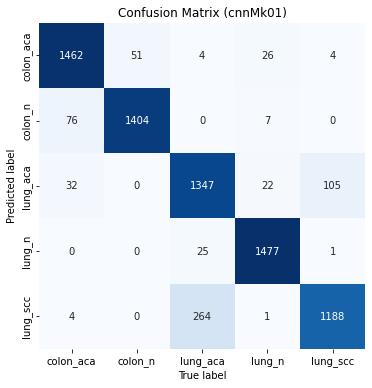

In [48]:
cnnMk01ConfuseMatrix= confuseMatrix(y_test, cnnMk01Predict, modelTag[0], imageTag[0])

In [49]:
cnnMk01Report= classReport(cnnMk01ConfuseMatrix[0], cnnMk01Predict)
cnnMk01Report[0]['macro avg']

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1547
           1       0.96      0.94      0.95      1487
           2       0.82      0.89      0.86      1506
           3       0.96      0.98      0.97      1503
           4       0.92      0.82      0.86      1457

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500



{'precision': 0.9187716368475938,
 'recall': 0.916347098971689,
 'f1-score': 0.9166160341126985,
 'support': 7500}

In [50]:
cnnMk01Kfold= kfoldCrossVal(cnnMk01, X, y, X_train, y_train)

1400/1400 [==============================] - 82s 59ms/step - loss: 0.1939 - accuracy: 0.9264
accuracy: 0.9264
1400/1400 [==============================] - 89s 63ms/step - loss: 0.1921 - accuracy: 0.9277
accuracy: 0.9277
1400/1400 [==============================] - 90s 64ms/step - loss: 0.1923 - accuracy: 0.9259
accuracy: 0.9259
1400/1400 [==============================] - 96s 69ms/step - loss: 0.1914 - accuracy: 0.9266
accuracy: 0.9266
1400/1400 [==============================] - 97s 69ms/step - loss: 0.1931 - accuracy: 0.9274
accuracy: 0.9274
[0.9263571500778198, 0.9277142882347107, 0.9259285926818848, 0.9266428351402283, 0.9273571372032166] 0.9268000006675721
0.9268 (+/- 0.0007)


In [51]:
cnnMk01Arr= modelArray(cnnMk01Eval[0][1], cnnMk01Report[0], cnnMk01Eval[1], cnnMk01Kfold[1])
cnnMk01Arr

[0.9170666933059692, 0.9187716368475938, 0.916347098971689, 0.9166160341126985, 7500, 52598.28853607178, 0.9268000006675721]


[0.9170666933059692,
 0.9187716368475938,
 0.916347098971689,
 0.9166160341126985,
 7500,
 52598.28853607178,
 0.9268000006675721]

In [52]:
np.save('cnnMk01Arr.npy', cnnMk01Arr)

In [53]:
cnnMk01Arr= np.load('cnnMk01Arr.npy')
cnnMk01Arr

array([9.17066693e-01, 9.18771637e-01, 9.16347099e-01, 9.16616034e-01,
       7.50000000e+03, 5.25982885e+04, 9.26800001e-01])

### cnnMk02 Summary

In [65]:
def modelSummary(model, X, y, xTrain, yTrain, xTest, yTest, modelTag, imageTag):
    predictX= predictClass(model, xTest)
    evalMod= evalModel(model, xTest, yTest)
    confuseMatrixMod= confuseMatrix(yTest, predictX, modelTag, imageTag)
    classReportMod= classReport(confuseMatrixMod[0], predictX)
    kfoldCrossValMod= kfoldCrossVal(model, X, y, xTrain, yTrain)
    modelArr= modelArray(evalMod[0][1], classReportMod[0], evalMod[1], kfoldCrossValMod[1])
    return modelArr

750/750 [==============================] - 403s 536ms/step - loss: 0.1103 - accuracy: 0.9600

Test loss: 0.110312, Test accuracy: 0.960000
    |    0    1    2    3    4 
-------------------------------
 0| 1518   23    0    6    0 
 1|  100 1384    0    3    0 
 2|    0    0 1412   13   81 
 3|    0    0    3 1500    0 
 4|    0    0   71    0 1386 


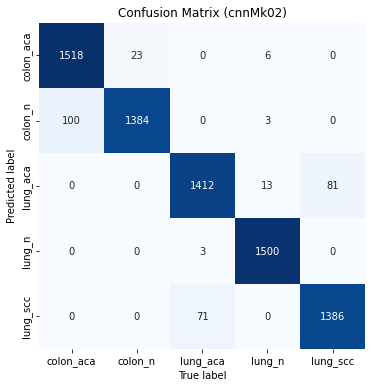

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1547
           1       0.98      0.93      0.96      1487
           2       0.95      0.94      0.94      1506
           3       0.99      1.00      0.99      1503
           4       0.94      0.95      0.95      1457

    accuracy                           0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500

1400/1400 [==============================] - 619s 442ms/step - loss: 0.0990 - accuracy: 0.9630
accuracy: 0.9630
1400/1400 [==============================] - 834s 595ms/step - loss: 0.1040 - accuracy: 0.9616
accuracy: 0.9616
1400/1400 [==============================] - 975s 696ms/step - loss: 0.1013 - accuracy: 0.9624
accuracy: 0.9624
1400/1400 [==============================] - 795s 568ms/step - loss: 0.1024 - accuracy: 0.9625
accuracy: 0.9625
1400/1400 [==============================] - 800s 571ms/step - 

In [66]:
cnnMk02Summary= modelSummary(cnnMk02, X, y, X_train, y_train, X_test, y_test, modelTag[1], imageTag[1])

In [67]:
cnnMk02Summary

[0.9599999785423279,
 0.9604761922025438,
 0.9597687570501222,
 0.959861114276376,
 7500,
 403322.59726524353,
 0.9622285723686218]

In [68]:
np.save('cnnMk02Arr.npy', cnnMk02Summary)

In [69]:
cnnMk02Arr= np.load('cnnMk02Arr.npy')
cnnMk02Arr

array([9.59999979e-01, 9.60476192e-01, 9.59768757e-01, 9.59861114e-01,
       7.50000000e+03, 4.03322597e+05, 9.62228572e-01])

### cnnMk03 Summary

750/750 [==============================] - 63s 84ms/step - loss: 0.1960 - accuracy: 0.9181

Test loss: 0.196007, Test accuracy: 0.918133
    |    0    1    2    3    4 
-------------------------------
 0| 1432   20   85    5    5 
 1|  192 1294    1    0    0 
 2|    0    0 1429    5   72 
 3|    0    3   13 1487    0 
 4|    0    0  213    0 1244 


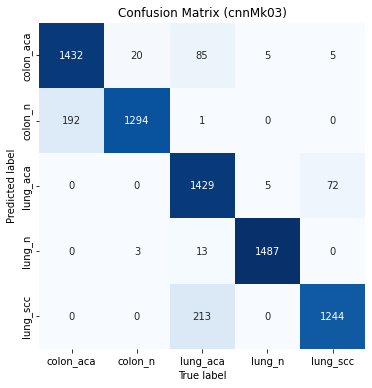

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1547
           1       0.98      0.87      0.92      1487
           2       0.82      0.95      0.88      1506
           3       0.99      0.99      0.99      1503
           4       0.94      0.85      0.90      1457

    accuracy                           0.92      7500
   macro avg       0.92      0.92      0.92      7500
weighted avg       0.92      0.92      0.92      7500

1400/1400 [==============================] - 93s 66ms/step - loss: 0.1892 - accuracy: 0.9236
accuracy: 0.9236
1400/1400 [==============================] - 106s 75ms/step - loss: 0.1893 - accuracy: 0.9227
accuracy: 0.9227
1400/1400 [==============================] - 100s 71ms/step - loss: 0.1904 - accuracy: 0.9230
accuracy: 0.9230
1400/1400 [==============================] - 118s 84ms/step - loss: 0.1912 - accuracy: 0.9227
accuracy: 0.9227
1400/1400 [==============================] - 115s 82ms/step - loss: 

In [57]:
cnnMk03Summary= modelSummary(cnnMk03, X2, y, X2_train, y2_train, X2_test, y2_test,
                             modelTag[2], imageTag[2])

In [58]:
np.save('cnnMk03Arr.npy', cnnMk03Summary)

### cnnMk04 Summary

750/750 [==============================] - 74s 99ms/step - loss: 0.3010 - accuracy: 0.8847

Test loss: 0.301015, Test accuracy: 0.884667
    |    0    1    2    3    4 
-------------------------------
 0|  963  516   48    6   14 
 1|    0 1485    0    2    0 
 2|    0    0 1276    5  225 
 3|    0    0   21 1482    0 
 4|    0    0   28    0 1429 


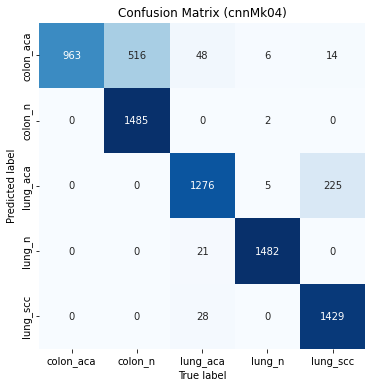

              precision    recall  f1-score   support

           0       1.00      0.62      0.77      1547
           1       0.74      1.00      0.85      1487
           2       0.93      0.85      0.89      1506
           3       0.99      0.99      0.99      1503
           4       0.86      0.98      0.91      1457

    accuracy                           0.88      7500
   macro avg       0.90      0.89      0.88      7500
weighted avg       0.91      0.88      0.88      7500

1400/1400 [==============================] - 97s 69ms/step - loss: 0.2648 - accuracy: 0.8975
accuracy: 0.8975
1400/1400 [==============================] - 118s 84ms/step - loss: 0.2659 - accuracy: 0.8989
accuracy: 0.8989
1400/1400 [==============================] - 96s 68ms/step - loss: 0.2646 - accuracy: 0.8974
accuracy: 0.8974
1400/1400 [==============================] - 136s 97ms/step - loss: 0.2678 - accuracy: 0.8979
accuracy: 0.8979
1400/1400 [==============================] - 137s 98ms/step - loss: 0

In [71]:
cnnMk04Summary= modelSummary(cnnMk04, X2, y, X2_train, y2_train, X2_test, y2_test,
                             modelTag[3], imageTag[3])

In [72]:
np.save('cnnMk04Arr.npy', cnnMk04Summary)

### cnnMk05 Summary

750/750 [==============================] - 42s 55ms/step - loss: 0.1701 - accuracy: 0.9348

Test loss: 0.170067, Test accuracy: 0.934800
    |    0    1    2    3    4 
-------------------------------
 0| 1508   18    9    4    8 
 1|  198 1289    0    0    0 
 2|   12    0 1373   12  109 
 3|    0    0   13 1490    0 
 4|    0    0  106    0 1351 


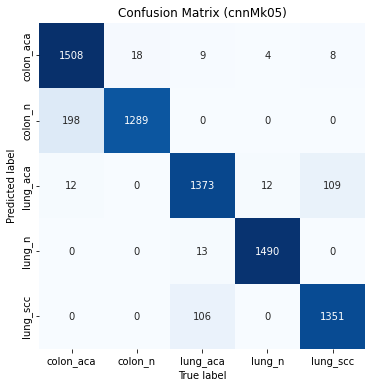

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1547
           1       0.99      0.87      0.92      1487
           2       0.91      0.91      0.91      1506
           3       0.99      0.99      0.99      1503
           4       0.92      0.93      0.92      1457

    accuracy                           0.93      7500
   macro avg       0.94      0.93      0.93      7500
weighted avg       0.94      0.93      0.93      7500

1400/1400 [==============================] - 105s 75ms/step - loss: 0.1674 - accuracy: 0.9351
accuracy: 0.9351
1400/1400 [==============================] - 117s 83ms/step - loss: 0.1689 - accuracy: 0.9336
accuracy: 0.9336
1400/1400 [==============================] - 126s 90ms/step - loss: 0.1677 - accuracy: 0.9351
accuracy: 0.9351
1400/1400 [==============================] - 129s 92ms/step - loss: 0.1666 - accuracy: 0.9345
accuracy: 0.9345
1400/1400 [==============================] - 116s 83ms/step - loss:

In [73]:
cnnMk05Summary= modelSummary(cnnMk05, X2, y, X2_train, y2_train, X2_test, y2_test,
                             modelTag[4], imageTag[4])

In [74]:
np.save('cnnMk05Arr.npy', cnnMk05Summary)

### cnnMk06 Summary

750/750 [==============================] - 58s 77ms/step - loss: 0.1200 - accuracy: 0.9509

Test loss: 0.120031, Test accuracy: 0.950933
    |    0    1    2    3    4 
-------------------------------
 0| 1475   72    0    0    0 
 1|   38 1449    0    0    0 
 2|   25    0 1341    4  136 
 3|    1    0   10 1492    0 
 4|    1    0   81    0 1375 


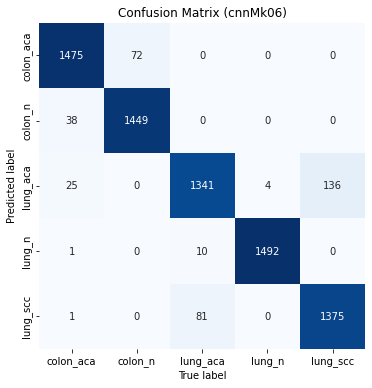

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1547
           1       0.95      0.97      0.96      1487
           2       0.94      0.89      0.91      1506
           3       1.00      0.99      0.99      1503
           4       0.91      0.94      0.93      1457

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500

1400/1400 [==============================] - 75s 53ms/step - loss: 0.1106 - accuracy: 0.9561
accuracy: 0.9561
1400/1400 [==============================] - 88s 63ms/step - loss: 0.1095 - accuracy: 0.9570
accuracy: 0.9570
1400/1400 [==============================] - 101s 72ms/step - loss: 0.1095 - accuracy: 0.9571
accuracy: 0.9571
1400/1400 [==============================] - 94s 67ms/step - loss: 0.1106 - accuracy: 0.9571
accuracy: 0.9571
1400/1400 [==============================] - 89s 64ms/step - loss: 0.1

In [59]:
cnnMk06Summary= modelSummary(cnnMk06, X2, y, X2_train, y2_train, X2_test, y2_test,
                             modelTag[5], imageTag[5])

In [60]:
np.save('cnnMk06Arr.npy', cnnMk06Summary)

### VGG16 Summary

750/750 [==============================] - 381s 507ms/step - loss: 0.7987 - accuracy: 0.9607

Test loss: 0.798685, Test accuracy: 0.960667
    |    0    1    2    3    4 
-------------------------------
 0| 1528    4   13    0    2 
 1|   41 1446    0    0    0 
 2|   22    0 1334    3  147 
 3|    0    0    9 1494    0 
 4|    2    0   52    0 1403 


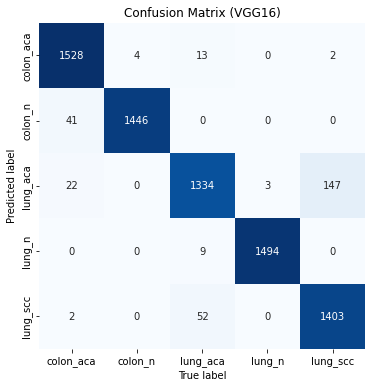

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1547
           1       1.00      0.97      0.98      1487
           2       0.95      0.89      0.92      1506
           3       1.00      0.99      1.00      1503
           4       0.90      0.96      0.93      1457

    accuracy                           0.96      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.96      0.96      0.96      7500

1400/1400 [==============================] - 730s 521ms/step - loss: 0.5199 - accuracy: 0.9736
accuracy: 0.9736
1400/1400 [==============================] - 719s 514ms/step - loss: 0.5324 - accuracy: 0.9729
accuracy: 0.9729
1400/1400 [==============================] - 736s 526ms/step - loss: 0.5374 - accuracy: 0.9725
accuracy: 0.9725
1400/1400 [==============================] - 715s 511ms/step - loss: 0.5302 - accuracy: 0.9727
accuracy: 0.9727
1400/1400 [==============================] - 692s 494ms/step - 

In [61]:
vgg16Summary= modelSummary(vgg16Model, X, y, X_train, y_train, X_test, y_test,
                             modelTag[6], imageTag[6])

In [62]:
np.save('vgg16Arr.npy', vgg16Summary)

### VGG19 Summary

750/750 [==============================] - 471s 626ms/step - loss: 1.0303 - accuracy: 0.9521

Test loss: 1.030329, Test accuracy: 0.952133
    |    0    1    2    3    4 
-------------------------------
 0| 1483   32   23    7    2 
 1|   17 1464    0    6    0 
 2|   13    3 1431   19   40 
 3|    0    0    4 1499    0 
 4|    5    0  188    0 1264 


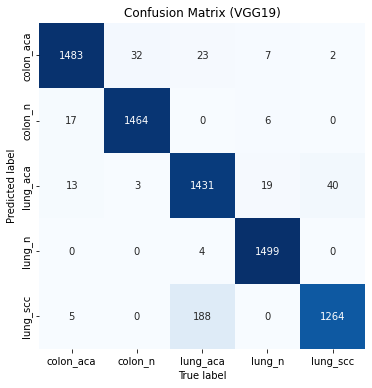

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1547
           1       0.98      0.98      0.98      1487
           2       0.87      0.95      0.91      1506
           3       0.98      1.00      0.99      1503
           4       0.97      0.87      0.91      1457

    accuracy                           0.95      7500
   macro avg       0.95      0.95      0.95      7500
weighted avg       0.95      0.95      0.95      7500

1400/1400 [==============================] - 889s 635ms/step - loss: 0.5765 - accuracy: 0.9686
accuracy: 0.9686
1400/1400 [==============================] - 896s 640ms/step - loss: 0.5403 - accuracy: 0.9689
accuracy: 0.9689
1400/1400 [==============================] - 819s 585ms/step - loss: 0.6238 - accuracy: 0.9666
accuracy: 0.9666
1400/1400 [==============================] - 830s 593ms/step - loss: 0.6405 - accuracy: 0.9661
accuracy: 0.9661
1400/1400 [==============================] - 809s 578ms/step - 

In [63]:
vgg19Summary= modelSummary(vgg19Model, X, y, X_train, y_train, X_test, y_test,
                             modelTag[7], imageTag[7])

In [64]:
np.save('vgg19Arr.npy', vgg19Summary)

### Xception Summary

In [39]:
# xceptionPredict= predictClass(xceptionModel, X_test)

235/235 [==============================] - 179s 747ms/step


In [42]:
# xceptionEval= evalModel(xceptionModel, X_test, y_test)

750/750 [==============================] - 241s 317ms/step - loss: 10.4117 - accuracy: 0.7495

Test loss: 10.411689, Test accuracy: 0.749467


    |    0    1    2    3    4 
-------------------------------
 0|  507  870  133   13   24 
 1|   21 1440   23    3    0 
 2|    7    6 1369   12  112 
 3|    5   61  186 1250    1 
 4|    5    4  393    0 1055 


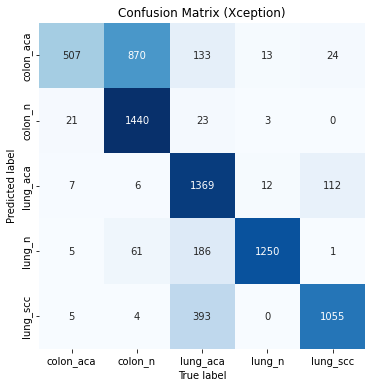

In [40]:
xceptionConfuseMatrix= confuseMatrix(y_test, xceptionPredict, modelTag[8], imageTag[8])

In [41]:
xceptionReport= classReport(xceptionConfuseMatrix[0], xceptionPredict)
xceptionReport[0]['macro avg']

              precision    recall  f1-score   support

           0       0.93      0.33      0.48      1547
           1       0.60      0.97      0.74      1487
           2       0.65      0.91      0.76      1506
           3       0.98      0.83      0.90      1503
           4       0.89      0.72      0.80      1457

    accuracy                           0.75      7500
   macro avg       0.81      0.75      0.74      7500
weighted avg       0.81      0.75      0.73      7500



{'precision': 0.8097772827512756,
 'recall': 0.7521829928888326,
 'f1-score': 0.7366414849892571,
 'support': 7500}

In [43]:
xceptionArr= []
xceptionArr.append(xceptionEval[0][1])
for i in xceptionReport[0]['macro avg']:
#         print(i)
    classMetric= xceptionReport[0]['macro avg'][i]
    xceptionArr.append(classMetric)

#     arr01.append(modelTag)
xceptionArr.append(xceptionEval[1])
xceptionArr.append(0.736)
print(xceptionArr)

[0.7494666576385498, 0.8097772827512756, 0.7521829928888326, 0.7366414849892571, 7500, 240804.105758667, 0.736]


In [44]:
np.save('xceptionArr.npy', xceptionArr)

### InceptionV3 Summary

In [26]:
inceptionV3Predict= predictClass(inceptionV3Model, X_test)

235/235 [==============================] - 459s 2s/step


In [27]:
inceptionV3Eval= evalModel(inceptionV3Model, X_test, y_test)

750/750 [==============================] - 2192s 3s/step - loss: 8.9094 - accuracy: 0.6107

Test loss: 8.909376, Test accuracy: 0.610667


In [34]:
inceptionV3Eval

[[8.90937614440918, 0.6106666922569275], 2192598.10256958]

    |    0    1    2    3    4 
-------------------------------
 0| 1461    6    5   17   58 
 1| 1202  183    5   70   27 
 2|  462    3  310  111  620 
 3|  171   20   16 1277   19 
 4|   80    2   15   11 1349 


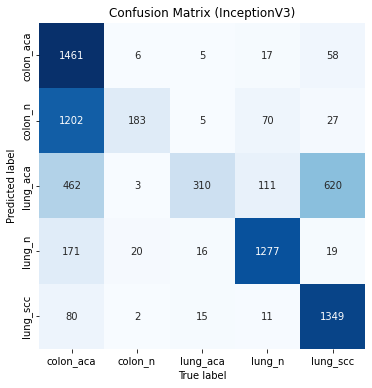

In [28]:
inceptionV3ConfuseMatrix= confuseMatrix(y_test, inceptionV3Predict, modelTag[9], imageTag[9])

In [29]:
inceptionV3Report= classReport(inceptionV3ConfuseMatrix[0], inceptionV3Predict)
inceptionV3Report[0]['macro avg']

              precision    recall  f1-score   support

           0       0.43      0.94      0.59      1547
           1       0.86      0.12      0.22      1487
           2       0.88      0.21      0.33      1506
           3       0.86      0.85      0.85      1503
           4       0.65      0.93      0.76      1457

    accuracy                           0.61      7500
   macro avg       0.74      0.61      0.55      7500
weighted avg       0.73      0.61      0.55      7500



{'precision': 0.7362386825278037,
 'recall': 0.6097655108265696,
 'f1-score': 0.5522704469179578,
 'support': 7500}

In [35]:
inceptionV3Arr= []
inceptionV3Arr.append(inceptionV3Eval[0][1])
for i in inceptionV3Report[0]['macro avg']:
#         print(i)
    classMetric= inceptionV3Report[0]['macro avg'][i]
    inceptionV3Arr.append(classMetric)

#     arr01.append(modelTag)
inceptionV3Arr.append(inceptionV3Eval[1])
inceptionV3Arr.append(0.55)
print(inceptionV3Arr)

[0.6106666922569275, 0.7362386825278037, 0.6097655108265696, 0.5522704469179578, 7500, 2192598.10256958, 0.55]


In [36]:
np.save('inceptionV3Arr.npy', inceptionV3Arr)

In [77]:
modelArr= []
modelArr.append(cnnMk01Arr)
modelArr.append(cnnMk02Summary)
modelArr.append(cnnMk03Summary)
modelArr.append(cnnMk04Summary)
modelArr.append(cnnMk05Summary)
modelArr.append(cnnMk06Summary)
modelArr.append(vgg16Summary)
modelArr.append(vgg19Summary)
modelArr.append(xceptionArr)
modelArr.append(inceptionV3Arr)

modelArr

[array([9.17066693e-01, 9.18771637e-01, 9.16347099e-01, 9.16616034e-01,
        7.50000000e+03, 5.25982885e+04, 9.26800001e-01]),
 [0.9599999785423279,
  0.9604761922025438,
  0.9597687570501222,
  0.959861114276376,
  7500,
  403322.59726524353,
  0.9622285723686218],
 [0.9181333184242249,
  0.9240265824298355,
  0.9175812098324032,
  0.9186582189039697,
  7500,
  63596.34780883789,
  0.9228000044822693],
 [0.8846666812896729,
  0.9038999392138752,
  0.8870476184393972,
  0.8816919008998866,
  7500,
  74468.01805496216,
  0.897599995136261],
 [0.9348000288009644,
  0.9376783842179138,
  0.9343841806130279,
  0.9347507079686196,
  7500,
  42298.59256744385,
  0.9342857003211975],
 [0.9509333372116089,
  0.9508454057454099,
  0.9509486043354751,
  0.9506930575225516,
  7500,
  58572.25680351257,
  0.9567999839782715],
 [0.9606666564941406,
  0.9611743766187064,
  0.9605771125135961,
  0.9604084671445763,
  7500,
  381787.83988952637,
  0.9729714512825012],
 [0.9521333575248718,
  0.9539

In [78]:
comparisonCols= ['accuracy', 'precision', 'recall', 'f1-score', 'roc_auc', 'runtime (ms)',
                 'meanAcc']

In [79]:
dfCnnModel= pd.DataFrame(modelArr, columns= comparisonCols)
dfCnnModel

,accuracy,precision,recall,f1-score,roc_auc,runtime (ms),meanAcc
0,0.917067,0.918772,0.916347,0.916616,7500.0,5.259829e+04,0.926800
1,0.960000,0.960476,0.959769,0.959861,7500.0,4.033226e+05,0.962229
2,0.918133,0.924027,0.917581,0.918658,7500.0,6.359635e+04,0.922800
3,0.884667,0.903900,0.887048,0.881692,7500.0,7.446802e+04,0.897600
4,0.934800,0.937678,0.934384,0.934751,7500.0,4.229859e+04,0.934286
5,0.950933,0.950845,0.950949,0.950693,7500.0,5.857226e+04,0.956800
6,0.960667,0.961174,0.960577,0.960408,7500.0,3.817878e+05,0.972971
7,0.952133,0.953983,0.951647,0.951871,7500.0,4.716761e+05,0.967429
8,0.749467,0.809777,0.752183,0.736641,7500.0,2.408041e+05,0.736000
9,0.610667,0.736239,0.609766,0.552270,7500.0,2.192598e+06,0.550000


In [80]:
dfCnnModel['model']= modelTag

In [81]:
dfCnnModel

,accuracy,precision,recall,f1-score,roc_auc,runtime (ms),meanAcc,model
0,0.917067,0.918772,0.916347,0.916616,7500.0,5.259829e+04,0.926800,cnnMk01
1,0.960000,0.960476,0.959769,0.959861,7500.0,4.033226e+05,0.962229,cnnMk02
2,0.918133,0.924027,0.917581,0.918658,7500.0,6.359635e+04,0.922800,cnnMk03
3,0.884667,0.903900,0.887048,0.881692,7500.0,7.446802e+04,0.897600,cnnMk04
4,0.934800,0.937678,0.934384,0.934751,7500.0,4.229859e+04,0.934286,cnnMk05
5,0.950933,0.950845,0.950949,0.950693,7500.0,5.857226e+04,0.956800,cnnMk06
6,0.960667,0.961174,0.960577,0.960408,7500.0,3.817878e+05,0.972971,VGG16
7,0.952133,0.953983,0.951647,0.951871,7500.0,4.716761e+05,0.967429,VGG19
8,0.749467,0.809777,0.752183,0.736641,7500.0,2.408041e+05,0.736000,Xception
9,0.610667,0.736239,0.609766,0.552270,7500.0,2.192598e+06,0.550000,InceptionV3


In [83]:
filepath = Path('cnnModelComparison.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
dfCnnModel.to_csv(filepath)